# [!] Notebook Description

Sinubi's Journey - ML - Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1A8KJASUOCzE6Uf2xaKIrLU8IdhD-P8YS?usp=sharing)

Oleh : Sinubi

September 2023 (230911)

# [A] Problem Definition and Scoping

Di sini kita akan mengelompokkan siswa berdasarkan waktu belajar siswa dan nilai siswa

# [B] Data Gathering and Preparation

In [ ]:
# Import Packages/Libraries yang diperlukan
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Download Dataset
gdown.download_folder("https://drive.google.com/drive/folders/1d0O3AuXl4z8VSj75v6WWuaxtUWXnmSYB?usp=sharing")

Retrieving folder list


Processing file 1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G Dataset SJ 01.xlsx
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G
To: /content/Sinubi's Journey/Dataset SJ 01.xlsx
100%|██████████| 12.2k/12.2k [00:00<00:00, 24.4MB/s]
Download completed


["/content/Sinubi's Journey/Dataset SJ 01.xlsx"]

In [ ]:
# Import Dataset
nama_file = "./Sinubi's Journey/Dataset SJ 01.xlsx"

data = pd.read_excel(nama_file, sheet_name='data')

# [C] Exploratory Data Analysis (EDA)

## [C1] Basic Information

In [ ]:
# Melihat Data pada Dataset yang dimuat (5 Data Pertama)
data.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
# Melihat Jumlah Kolom/Variabel serta Jumlah Baris Data atau Data Points
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nomor Induk     60 non-null     object 
 1   Nama            60 non-null     object 
 2   Jenis Kelamin   60 non-null     object 
 3   Mata Pelajaran  60 non-null     object 
 4   Akses Internet  60 non-null     object 
 5   Waktu Belajar   60 non-null     float64
 6   Nilai           60 non-null     int64  
 7   Lulus           60 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.9+ KB


## [C2] Data Type Correction

In [ ]:
# Kita ubah tipe data variabel fitur pada Dataset kita agar menjadi variabel numerik
# catatan : tidak perlu karena sudah numerik semua

daftar_nama_kolom_numerik = ['Waktu Belajar', 'Nilai']

for nama_kolom in daftar_nama_kolom_numerik:
  data[nama_kolom] = pd.to_numeric(data[nama_kolom])

In [ ]:
# Kita ubah tipe data viarabel taget pada Dataset kita agar menjadi variabel kategorik

daftar_nama_kolom_kategorik = ['Jenis Kelamin', 'Mata Pelajaran','Akses Internet','Lulus']

for nama_kolom in daftar_nama_kolom_kategorik:
  data[nama_kolom] = data[nama_kolom].astype('category')

In [ ]:
# Kita periksa kembali informasi mengenai Dataset kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Nomor Induk     60 non-null     object  
 1   Nama            60 non-null     object  
 2   Jenis Kelamin   60 non-null     category
 3   Mata Pelajaran  60 non-null     category
 4   Akses Internet  60 non-null     category
 5   Waktu Belajar   60 non-null     float64 
 6   Nilai           60 non-null     int64   
 7   Lulus           60 non-null     category
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


## [C3] Missing Values

In [ ]:
# Kita akan periksa apakah Dataset memiliki nilai kosong atau missing values
data.isnull().sum()

Nomor Induk       0
Nama              0
Jenis Kelamin     0
Mata Pelajaran    0
Akses Internet    0
Waktu Belajar     0
Nilai             0
Lulus             0
dtype: int64

## [C4] Univariate Analysis

### [C4.A] Descriptive Statistics

In [ ]:
# Statistik Deskriptif untuk setiap Variabel Numerik
data.describe()

,Waktu Belajar,Nilai
count,60.000000,60.000000
mean,5.998333,63.966667
std,2.154655,19.961800
min,1.900000,23.000000
25%,3.875000,45.750000
50%,6.750000,66.500000
75%,7.750000,81.250000
max,9.400000,92.000000


### [C4.B] Histogram

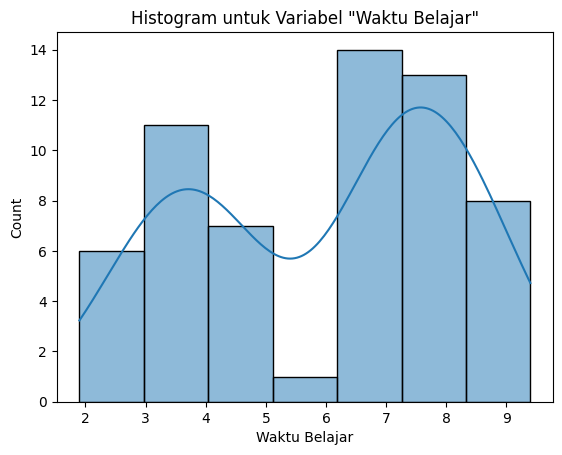

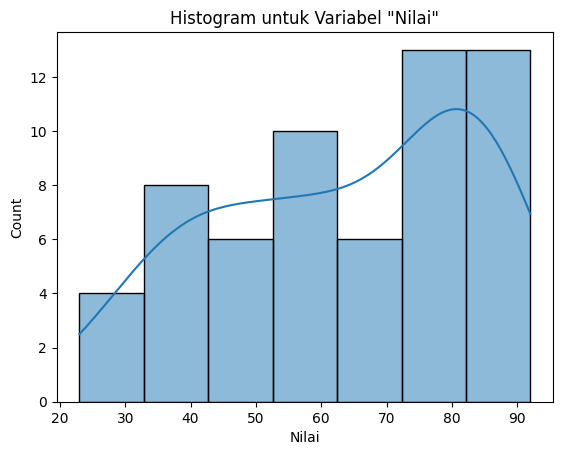

In [ ]:
# Visualisasi Histogram untuk setiap Variabel Numerik

for nama_kolom in daftar_nama_kolom_numerik:
  judul = 'Histogram untuk Variabel "' + nama_kolom + '"'

  plot = sns.histplot(data = data, x = nama_kolom, kde=True)
  plot_title = plt.title(judul)

  plt.show()
  print()

### [C4.C] Bar Chart

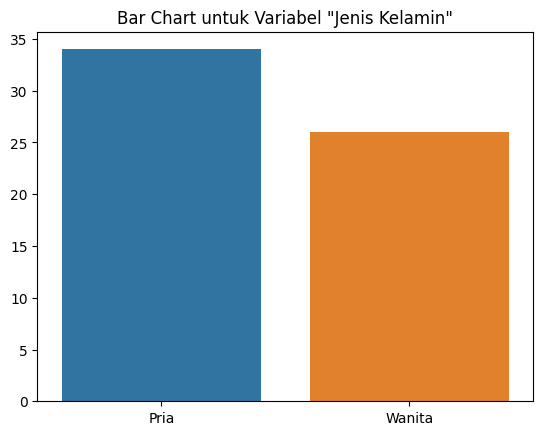

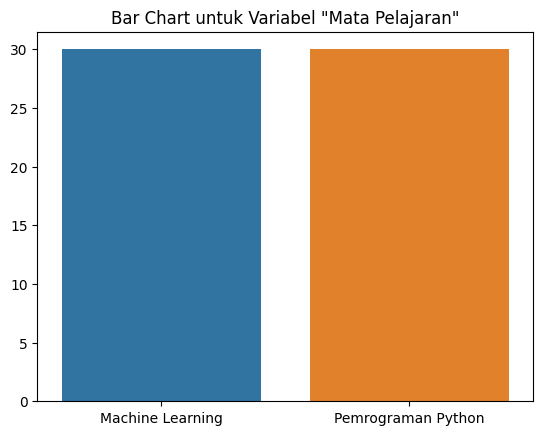

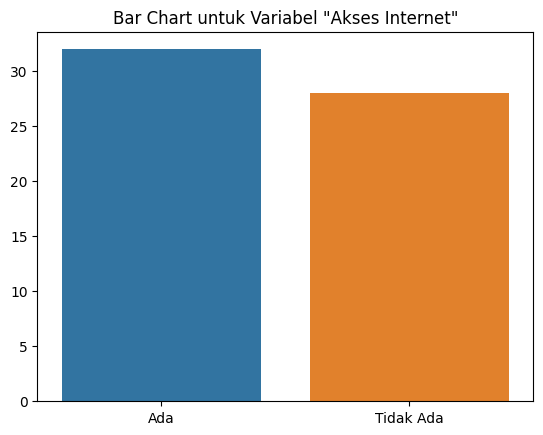

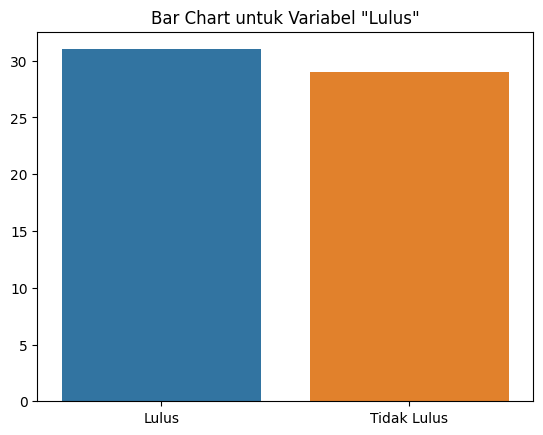

In [ ]:
# Visualisasi Distribusi Frequency dari Level untuk Variabel Kategorik pada Dataset
# menggunakan Bar Chart

palet_warna = sns.color_palette('bright')

for nama_kolom in daftar_nama_kolom_kategorik :
  judul = 'Bar Chart untuk Variabel "' + nama_kolom + '"'

  data_plot  = data[nama_kolom].value_counts().to_list()
  label_plot = data[nama_kolom].value_counts().index.to_list()

  plot       = sns.barplot(x = label_plot, y = data_plot)
  plot_title = plt.title(judul)

  plt.show()
  print()

## [C5] Bivariate Analysis

### [C.5.A] Scatterplot


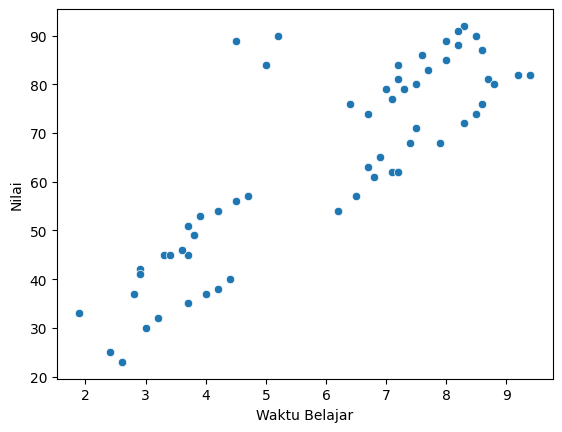

In [ ]:
sns.scatterplot(data=data, x="Waktu Belajar", y="Nilai");

# [D] Data Wrangling and Variable Transformation

## [D1] Defining Features Variables

In [ ]:
data_proc1 = data.copy()

In [ ]:
# Mendefinisikan Variabel Fitur/Independent/Predictor/X

daftar_variabel_fitur = ['Waktu Belajar','Nilai']

X = data_proc1[daftar_variabel_fitur]
X[0:5]

,Waktu Belajar,Nilai
0,8.0,85
1,7.5,80
2,8.5,90
3,8.2,88
4,7.7,83


## [D2] Features Scaling for Numerical Variables

In [ ]:
X[0:5]

,Waktu Belajar,Nilai
0,8.0,85
1,7.5,80
2,8.5,90
3,8.2,88
4,7.7,83


In [ ]:
# Kita akan menggunakan "Min-Max Scaler" [0 s/d 1]
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[0:5]

array([[0.81333333, 0.89855072],
       [0.74666667, 0.82608696],
       [0.88      , 0.97101449],
       [0.84      , 0.94202899],
       [0.77333333, 0.86956522]])

# [E] Modelling

## [E1] Agglomerative Clustering

### [E1.A] Dendrogram

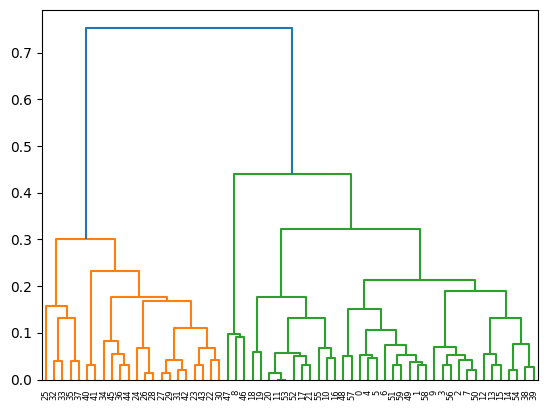

In [ ]:
linkage_data = linkage(X_scaled, method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

### [E1.B] Create Cluster

In [ ]:
hierarchical_cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
hierarchical_cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hierarchical_cluster_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
hierarchical_cluster_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
hierarchical_cluster_6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')

In [ ]:
labels_hierarchical_cluster_2 = hierarchical_cluster_2.fit_predict(X_scaled)
labels_hierarchical_cluster_3 = hierarchical_cluster_3.fit_predict(X_scaled)
labels_hierarchical_cluster_4 = hierarchical_cluster_4.fit_predict(X_scaled)
labels_hierarchical_cluster_5 = hierarchical_cluster_5.fit_predict(X_scaled)
labels_hierarchical_cluster_6 = hierarchical_cluster_6.fit_predict(X_scaled)

## [E2] K-Means

In [ ]:
kmeans_cluster_2 = KMeans(n_clusters=2, init='k-means++', random_state=123)
kmeans_cluster_2.fit(X_scaled)

KMeans(n_clusters=2, random_state=123)

In [ ]:
kmeans_cluster_3 = KMeans(n_clusters=3, init='k-means++', random_state=123)
kmeans_cluster_3.fit(X_scaled)

KMeans(n_clusters=3, random_state=123)

In [ ]:
kmeans_cluster_4 = KMeans(n_clusters=4, init='k-means++', random_state=123)
kmeans_cluster_4.fit(X_scaled)

KMeans(n_clusters=4, random_state=123)

In [ ]:
kmeans_cluster_5 = KMeans(n_clusters=5, init='k-means++', random_state=123)
kmeans_cluster_5.fit(X_scaled)

KMeans(n_clusters=5, random_state=123)

In [ ]:
kmeans_cluster_6 = KMeans(n_clusters=6, init='k-means++', random_state=123)
kmeans_cluster_6.fit(X_scaled)

KMeans(n_clusters=6, random_state=123)

# [F] Model Evaluation

## [F1] Cluster Prediction

### [F1.A] Agglomerative Clustering

#### [F1.A.1] 2 Cluster

In [ ]:
# Prediksi untuk 2 Cluster
df_hierarchical_cluster_2 = X.copy()
df_hierarchical_cluster_2['Cluster'] = labels_hierarchical_cluster_2
df_hierarchical_cluster_2.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
47,4.5,89,0
46,5.0,84,0
8,5.2,90,0
19,6.2,54,0
48,6.4,76,0
18,6.5,57,0
17,6.7,63,0
57,6.7,74,0
21,6.8,61,0
52,6.9,65,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

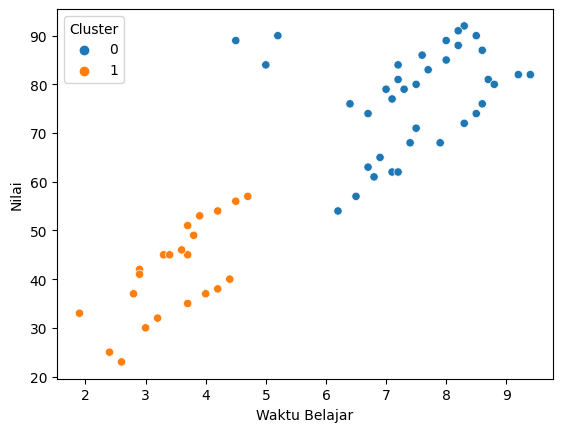

In [ ]:
sns.scatterplot(data=df_hierarchical_cluster_2,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.A.2] 3 Cluster

In [ ]:
# Prediksi untuk 3 Cluster
df_hierarchical_cluster_3 = X.copy()
df_hierarchical_cluster_3['Cluster'] = labels_hierarchical_cluster_3
df_hierarchical_cluster_3.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
19,6.2,54,0
48,6.4,76,0
18,6.5,57,0
17,6.7,63,0
57,6.7,74,0
21,6.8,61,0
52,6.9,65,0
51,7.0,79,0
20,7.1,62,0
59,7.1,77,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

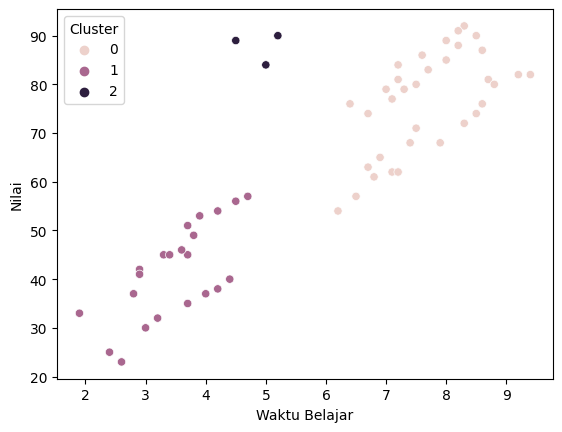

In [ ]:
sns.scatterplot(data=df_hierarchical_cluster_3,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.A.3] 4 Cluster

In [ ]:
# Prediksi untuk 4 Cluster
df_hierarchical_cluster_4 = X.copy()
df_hierarchical_cluster_4['Cluster'] = labels_hierarchical_cluster_4
df_hierarchical_cluster_4.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
25,1.9,33,0
33,2.4,25,0
32,2.6,23,0
24,2.8,37,0
28,2.9,41,0
26,2.9,42,0
37,3.0,30,0
35,3.2,32,0
27,3.3,45,0
29,3.4,45,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

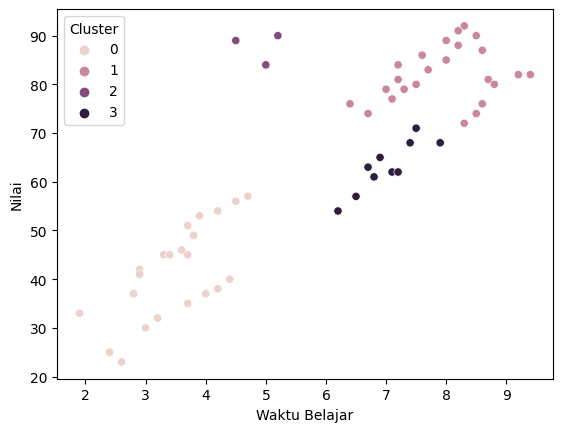

In [ ]:
sns.scatterplot(data=df_hierarchical_cluster_4,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.A.4] 5 Cluster

In [ ]:
# Prediksi untuk 5 Cluster
df_hierarchical_cluster_5 = X.copy()
df_hierarchical_cluster_5['Cluster'] = labels_hierarchical_cluster_5
df_hierarchical_cluster_5.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
24,2.8,37,0
28,2.9,41,0
26,2.9,42,0
27,3.3,45,0
29,3.4,45,0
42,3.6,46,0
34,3.7,35,0
31,3.7,45,0
23,3.7,51,0
43,3.8,49,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

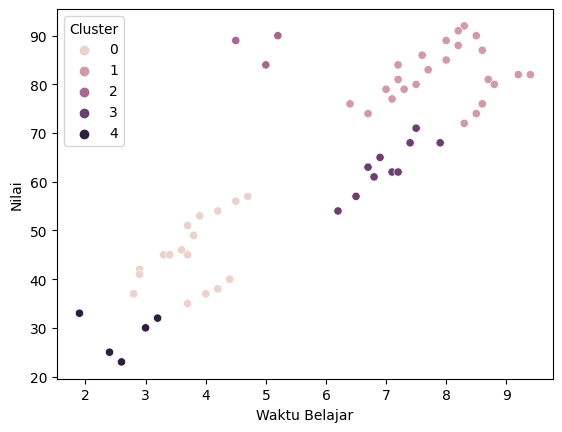

In [ ]:
sns.scatterplot(data=df_hierarchical_cluster_5,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.A.5] 6 Cluster

In [ ]:
# Prediksi untuk 6 Cluster
df_hierarchical_cluster_6 = X.copy()
df_hierarchical_cluster_6['Cluster'] = labels_hierarchical_cluster_6
df_hierarchical_cluster_6.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
48,6.4,76,0
57,6.7,74,0
51,7.0,79,0
59,7.1,77,0
49,7.2,81,0
6,7.2,84,0
58,7.3,79,0
1,7.5,80,0
5,7.6,86,0
4,7.7,83,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

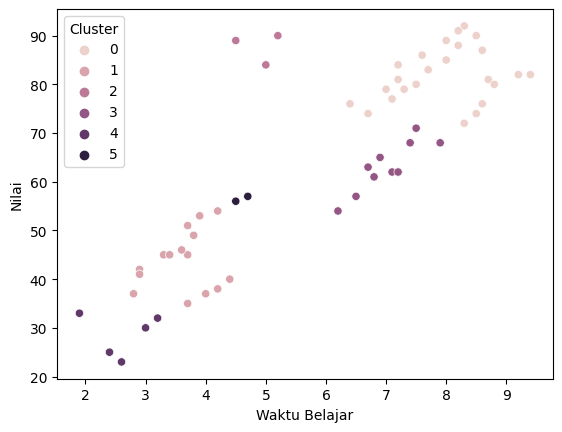

In [ ]:
sns.scatterplot(data=df_hierarchical_cluster_6,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

### [F1.B] K-Means

#### [F1.B.1] 2 Cluster

In [ ]:
# Prediksi untuk 2 Cluster
df_kmeans_cluster_2 = X.copy()
df_kmeans_cluster_2['Cluster'] = kmeans_cluster_2.labels_
df_kmeans_cluster_2.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
25,1.9,33,0
33,2.4,25,0
32,2.6,23,0
24,2.8,37,0
28,2.9,41,0
26,2.9,42,0
37,3.0,30,0
35,3.2,32,0
27,3.3,45,0
29,3.4,45,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

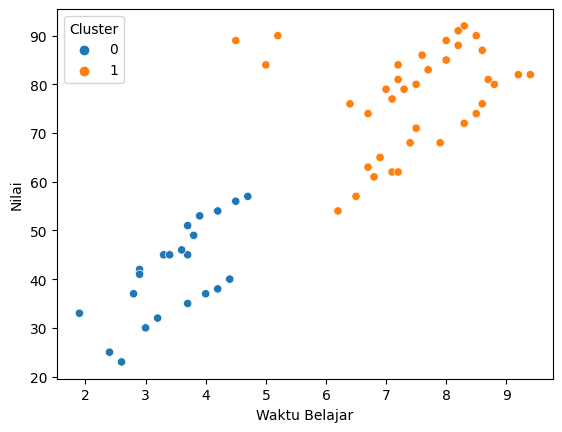

In [ ]:
sns.scatterplot(data=df_kmeans_cluster_2,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.B.2] 3 Cluster

In [ ]:
# Prediksi untuk 3 Cluster
df_kmeans_cluster_3 = X.copy()
df_kmeans_cluster_3['Cluster'] = kmeans_cluster_3.labels_
df_kmeans_cluster_3.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
25,1.9,33,0
33,2.4,25,0
32,2.6,23,0
24,2.8,37,0
28,2.9,41,0
26,2.9,42,0
37,3.0,30,0
35,3.2,32,0
27,3.3,45,0
29,3.4,45,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

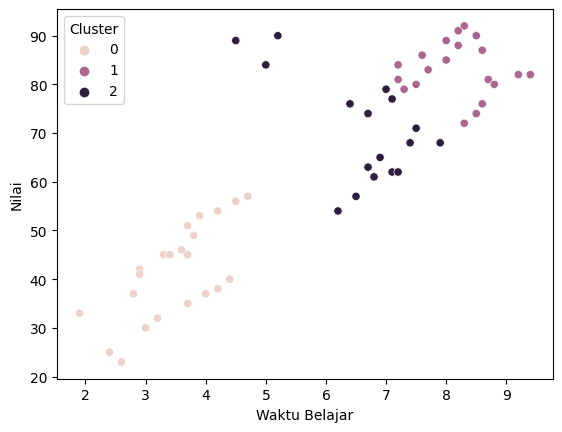

In [ ]:
sns.scatterplot(data=df_kmeans_cluster_3,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.B.3] 4 Cluster

In [ ]:
# Prediksi untuk 4 Cluster
df_kmeans_cluster_4 = X.copy()
df_kmeans_cluster_4['Cluster'] = kmeans_cluster_4.labels_
df_kmeans_cluster_4.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
47,4.5,89,0
46,5.0,84,0
8,5.2,90,0
25,1.9,33,1
33,2.4,25,1
32,2.6,23,1
24,2.8,37,1
28,2.9,41,1
26,2.9,42,1
37,3.0,30,1


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

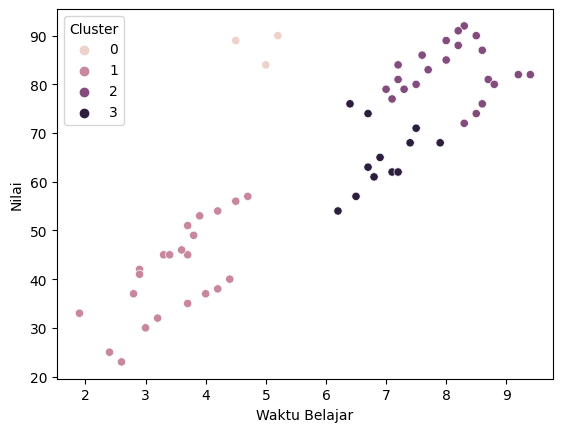

In [ ]:
sns.scatterplot(data=df_kmeans_cluster_4,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.B.4] 5 Cluster

In [ ]:
# Prediksi untuk 5 Cluster
df_kmeans_cluster_5 = X.copy()
df_kmeans_cluster_5['Cluster'] = kmeans_cluster_5.labels_
df_kmeans_cluster_5.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
27,3.3,45,0
29,3.4,45,0
42,3.6,46,0
31,3.7,45,0
23,3.7,51,0
43,3.8,49,0
30,3.9,53,0
44,4.2,38,0
22,4.2,54,0
45,4.4,40,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

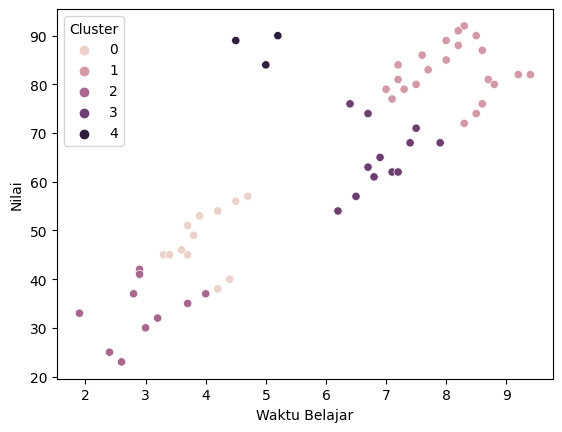

In [ ]:
sns.scatterplot(data=df_kmeans_cluster_5,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

#### [F1.B.5] 6 Cluster

In [ ]:
# Prediksi untuk 6 Cluster
df_kmeans_cluster_6 = X.copy()
df_kmeans_cluster_6['Cluster'] = kmeans_cluster_6.labels_
df_kmeans_cluster_6.sort_values(['Cluster','Waktu Belajar','Nilai'])

,Waktu Belajar,Nilai,Cluster
27,3.3,45,0
29,3.4,45,0
42,3.6,46,0
31,3.7,45,0
23,3.7,51,0
43,3.8,49,0
30,3.9,53,0
36,4.0,37,0
44,4.2,38,0
22,4.2,54,0


<Axes: xlabel='Waktu Belajar', ylabel='Nilai'>

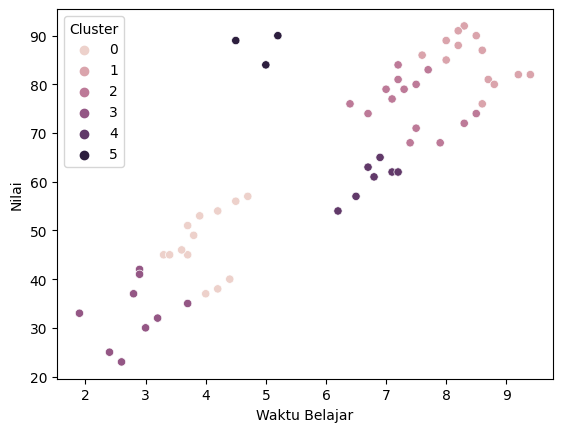

In [ ]:
sns.scatterplot(data=df_kmeans_cluster_6,
                x="Waktu Belajar", y="Nilai", hue="Cluster")

## [F2] Evaluating Model with Elbow Method for K-Means

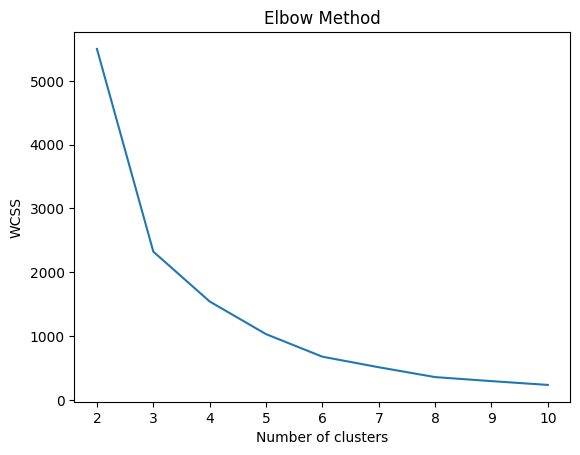

In [ ]:
# within-cluster sum of squares (WCSS)
wcss = []

cluster_min = 2
cluster_max = 10

for k in range(cluster_min, cluster_max+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(cluster_min, cluster_max+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## [F3] Evaluating Model with Silhouette Scores

### [F3.A] Silhouette Scores for Agglomerative Clustering

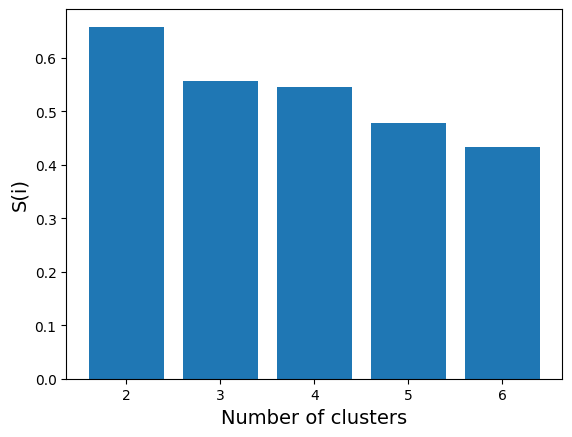

In [ ]:
silhouette_scores_list = []
cluster_list = [2,3,4,5,6]

silhouette_scores_hierarchical_cluster_2 = silhouette_score(X_scaled, labels_hierarchical_cluster_2)
silhouette_scores_list.append(silhouette_scores_hierarchical_cluster_2)

silhouette_scores_hierarchical_cluster_3 = silhouette_score(X_scaled, labels_hierarchical_cluster_3)
silhouette_scores_list.append(silhouette_scores_hierarchical_cluster_3)

silhouette_scores_hierarchical_cluster_4 = silhouette_score(X_scaled, labels_hierarchical_cluster_4)
silhouette_scores_list.append(silhouette_scores_hierarchical_cluster_4)

silhouette_scores_hierarchical_cluster_5 = silhouette_score(X_scaled, labels_hierarchical_cluster_5)
silhouette_scores_list.append(silhouette_scores_hierarchical_cluster_5)

silhouette_scores_hierarchical_cluster_6 = silhouette_score(X_scaled, labels_hierarchical_cluster_6)
silhouette_scores_list.append(silhouette_scores_hierarchical_cluster_6)

plt.bar(cluster_list, silhouette_scores_list)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('S(i)', fontsize = 14)
plt.show()

In [ ]:
df_silhouette_scores = pd.DataFrame({'Number of Cluster':cluster_list,
                                     'Silhouette Score':silhouette_scores_list})
df_silhouette_scores

,Number of Cluster,Silhouette Score
0,2,0.657903
1,3,0.555548
2,4,0.545159
3,5,0.477184
4,6,0.432243


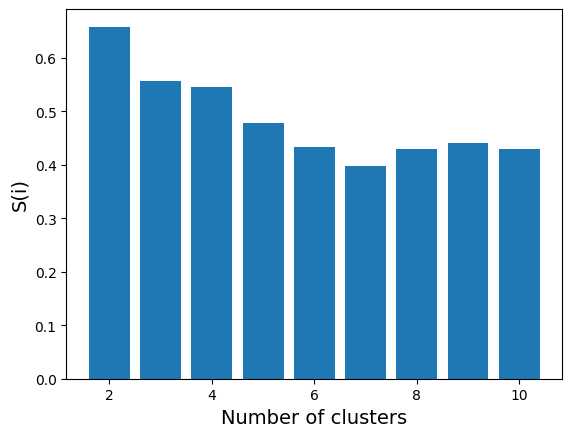

In [ ]:
silhouette_scores_list = []
cluster_list = []

cluster_min = 2
cluster_max = 10

for k in range(cluster_min,cluster_max+1):
  hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
  labels_hc = hc.fit_predict(X_scaled)

  cluster_list.append(k)
  silhouette_scores_list.append(silhouette_score(X_scaled, labels_hc))

plt.bar(cluster_list, silhouette_scores_list)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('S(i)', fontsize = 14)
plt.show()

In [ ]:
df_silhouette_scores = pd.DataFrame({'Number of Cluster':cluster_list,
                                     'Silhouette Score':silhouette_scores_list})
df_silhouette_scores

,Number of Cluster,Silhouette Score
0,2,0.657903
1,3,0.555548
2,4,0.545159
3,5,0.477184
4,6,0.432243
5,7,0.398467
6,8,0.429779
7,9,0.439897
8,10,0.429104


### [F3.B] Silhouette Scores for K-Means

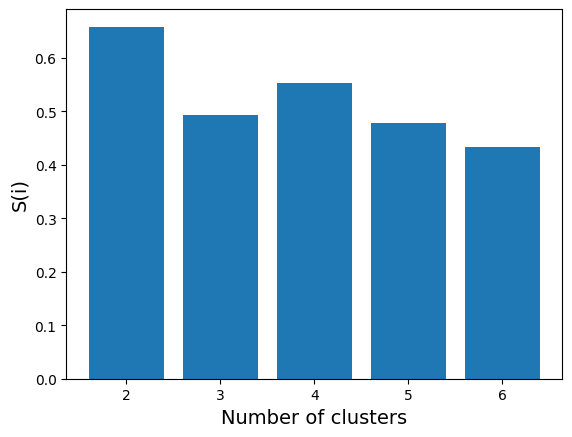

In [ ]:
silhouette_scores_list = []
cluster_list = [2,3,4,5,6]

silhouette_scores_kmeans_cluster_2 = silhouette_score(X_scaled, kmeans_cluster_2.labels_)
silhouette_scores_list.append(silhouette_scores_kmeans_cluster_2)

silhouette_scores_kmeans_cluster_3 = silhouette_score(X_scaled, kmeans_cluster_3.labels_)
silhouette_scores_list.append(silhouette_scores_kmeans_cluster_3)

silhouette_scores_kmeans_cluster_4 = silhouette_score(X_scaled, kmeans_cluster_4.labels_)
silhouette_scores_list.append(silhouette_scores_kmeans_cluster_4)

silhouette_scores_kmeans_cluster_5 = silhouette_score(X_scaled, kmeans_cluster_5.labels_)
silhouette_scores_list.append(silhouette_scores_kmeans_cluster_5)

silhouette_scores_kmeans_cluster_6 = silhouette_score(X_scaled, kmeans_cluster_6.labels_)
silhouette_scores_list.append(silhouette_scores_kmeans_cluster_6)

plt.bar(cluster_list, silhouette_scores_list)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('S(i)', fontsize = 14)
plt.show()

In [ ]:
df_silhouette_scores = pd.DataFrame({'Number of Cluster':cluster_list,
                                     'Silhouette Score':silhouette_scores_list})
df_silhouette_scores

,Number of Cluster,Silhouette Score
0,2,0.657903
1,3,0.492473
2,4,0.553249
3,5,0.477055
4,6,0.433853


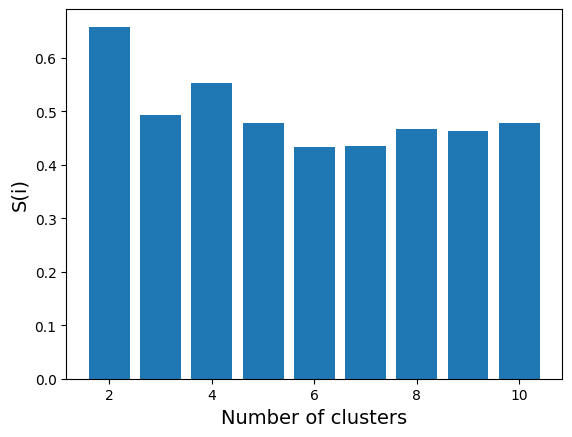

In [ ]:
silhouette_scores_list = []
cluster_list = []

cluster_min = 2
cluster_max = 10

for k in range(cluster_min,cluster_max+1):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
  kmeans.fit(X_scaled)
  labels_kmeans = kmeans.labels_

  cluster_list.append(k)
  silhouette_scores_list.append(silhouette_score(X_scaled, labels_kmeans))

plt.bar(cluster_list, silhouette_scores_list)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('S(i)', fontsize = 14)
plt.show()

In [ ]:
df_silhouette_scores = pd.DataFrame({'Number of Cluster':cluster_list,
                                     'Silhouette Score':silhouette_scores_list})
df_silhouette_scores

,Number of Cluster,Silhouette Score
0,2,0.657903
1,3,0.492473
2,4,0.553249
3,5,0.477055
4,6,0.433853
5,7,0.434453
6,8,0.466435
7,9,0.463026
8,10,0.478859
